In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# import mne
# import numpy as np
# from copy import deepcopy
# import matplotlib.pyplot as plt
import sys; sys.path.insert(0, '../')
from esinet import util
from esinet import Simulation
from esinet import Net
from esinet.forward import create_forward_model, get_info
pp = dict(surface='white', hemi='both', verbose=0)

## Create Forward model
First we create a template forward model which comes with the esinet package

In [2]:
info = get_info(sfreq=8000, kind='biosemi16')
fwd = create_forward_model(info=info, sampling='ico1')

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    1.7s remaining:    2.9s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    1.7s remaining:    1.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    1.8s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.0s finished


## Simulate

-- number of adjacent vertices : 84
Simulating data based on sparse patches.


100%|██████████| 2/2 [00:00<?, ?it/s]


source data shape:  (84, 20) (84, 20)


100%|██████████| 2/2 [00:00<00:00, 992.73it/s]


Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...


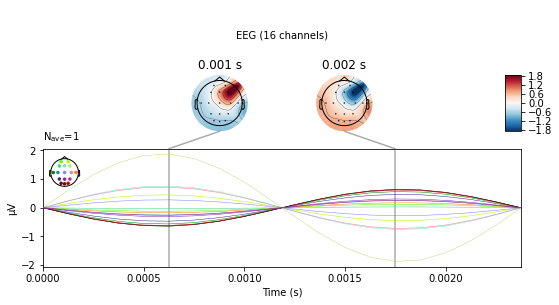

Using control points [0.0000000e+00 0.0000000e+00 1.2253174e-08]


In [5]:
%matplotlib qt
n_samples = 2
pulse_dur = 2.5 * 1e-3  # 25 ms
settings = dict(source_time_course="pulse", extents=35, number_of_sources=1, target_snr=99999999, duration_of_trial=pulse_dur)
sim = Simulation(fwd, info, settings=settings).simulate(n_samples=n_samples)
sim.source_data[0].plot(**pp)
sim.eeg_data[0].average().plot_joint()